# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | son la
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | bambari
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | batemans bay
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | russell
Processing Record 18 of Set 1 | tiznit
Processing Record 19 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | norman wells
Processing 

Processing Record 38 of Set 4 | leningradskiy
Processing Record 39 of Set 4 | yumen
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | lolua
City not found. Skipping...
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | vytegra
Processing Record 45 of Set 4 | itoman
Processing Record 46 of Set 4 | samarai
Processing Record 47 of Set 4 | lamu
Processing Record 48 of Set 4 | halalo
City not found. Skipping...
Processing Record 49 of Set 4 | bulawayo
Processing Record 0 of Set 5 | fengzhen
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | taburi
City not found. Skipping...
Processing Record 5 of Set 5 | saint-georges
Processing Record 6 of Set 5 | makakilo city
Processing Record 7 of Set 5 | kendari
Processing Record 8 of Set 5 | alice springs
Processing

Processing Record 26 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 8 | pachino
Processing Record 28 of Set 8 | sorland
Processing Record 29 of Set 8 | sakakah
Processing Record 30 of Set 8 | dudinka
Processing Record 31 of Set 8 | oistins
Processing Record 32 of Set 8 | nelson bay
Processing Record 33 of Set 8 | marathon
Processing Record 34 of Set 8 | whitehorse
Processing Record 35 of Set 8 | maragogi
Processing Record 36 of Set 8 | flinders
Processing Record 37 of Set 8 | chaltyr
Processing Record 38 of Set 8 | obo
Processing Record 39 of Set 8 | havre-saint-pierre
Processing Record 40 of Set 8 | airdrie
Processing Record 41 of Set 8 | lianzhou
Processing Record 42 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 43 of Set 8 | sangin
Processing Record 44 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 8 | ngama
Processing Record 46 of Set 8 | egvekinot
Processing Record 47 of Set 8 | faanui
Processing

Processing Record 15 of Set 12 | berlevag
Processing Record 16 of Set 12 | acatlan
Processing Record 17 of Set 12 | graaff-reinet
Processing Record 18 of Set 12 | kirakira
Processing Record 19 of Set 12 | sabang
Processing Record 20 of Set 12 | tucumcari
Processing Record 21 of Set 12 | teseney
Processing Record 22 of Set 12 | bara
Processing Record 23 of Set 12 | sept-iles
Processing Record 24 of Set 12 | singleton
Processing Record 25 of Set 12 | verkhnyaya toyma
Processing Record 26 of Set 12 | morondava
Processing Record 27 of Set 12 | port hardy
Processing Record 28 of Set 12 | the valley
Processing Record 29 of Set 12 | paamiut
Processing Record 30 of Set 12 | naze
Processing Record 31 of Set 12 | lima
Processing Record 32 of Set 12 | melong
Processing Record 33 of Set 12 | geraldton
Processing Record 34 of Set 12 | manggar
Processing Record 35 of Set 12 | kajaani
Processing Record 36 of Set 12 | shkotovo-22
City not found. Skipping...
Processing Record 37 of Set 12 | rumonge
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
       

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,11.81,54,20,8.75,AR,1675469362
1,bambous virieux,-20.3428,57.7575,24.01,83,20,1.41,MU,1675469363
2,aklavik,68.2191,-135.0107,-28.89,93,99,1.49,CA,1675469363
3,esperance,-33.8667,121.9000,19.70,61,60,5.61,AU,1675469364
4,monrovia,6.3005,-10.7969,24.87,91,0,2.91,LR,1675469364


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,11.81,54,20,8.75,AR,1675469362
1,bambous virieux,-20.3428,57.7575,24.01,83,20,1.41,MU,1675469363
2,aklavik,68.2191,-135.0107,-28.89,93,99,1.49,CA,1675469363
3,esperance,-33.8667,121.9000,19.70,61,60,5.61,AU,1675469364
4,monrovia,6.3005,-10.7969,24.87,91,0,2.91,LR,1675469364


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

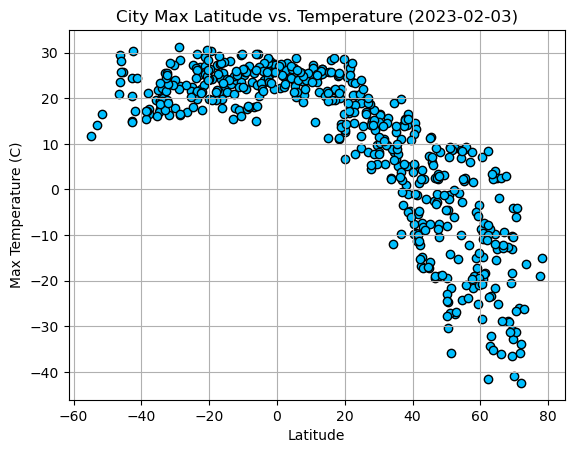

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker ="o", edgecolors="black", c="deepskyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

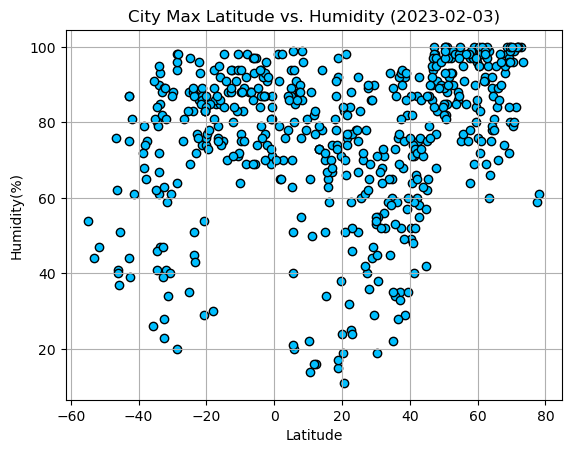

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker ="o", edgecolors="black", c="deepskyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

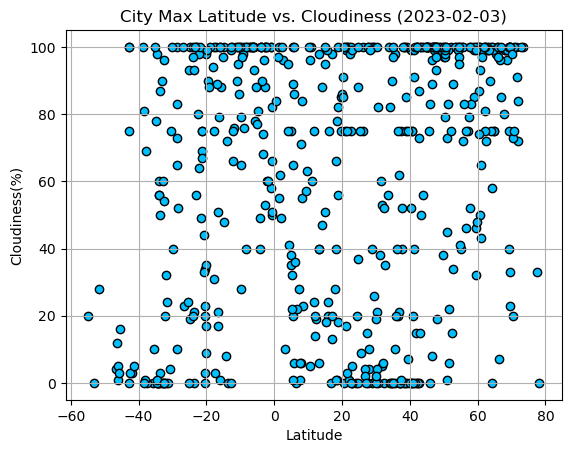

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker ="o", edgecolors="black", c="deepskyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

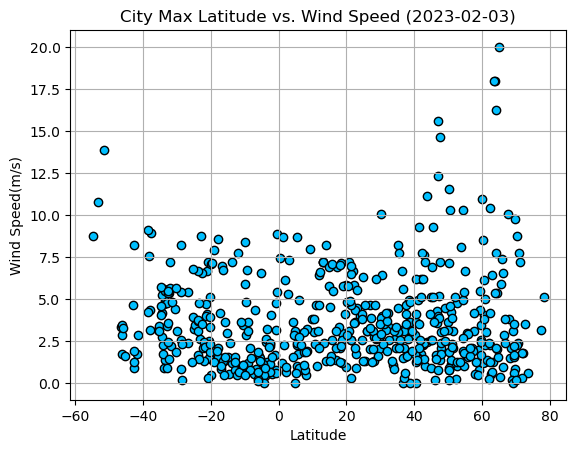

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker ="o", edgecolors="black", c="deepskyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aklavik,68.2191,-135.0107,-28.89,93,99,1.49,CA,1675469363
4,monrovia,6.3005,-10.7969,24.87,91,0,2.91,LR,1675469364
6,son la,21.3167,103.9000,16.85,98,99,0.31,VN,1675469364
7,nikolskoye,59.7035,30.7861,-3.45,96,100,2.58,RU,1675469365
8,jamestown,42.0970,-79.2353,-12.23,87,100,6.17,US,1675469320


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lng"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,11.81,54,20,8.75,AR,1675469362
2,aklavik,68.2191,-135.0107,-28.89,93,99,1.49,CA,1675469363
4,monrovia,6.3005,-10.7969,24.87,91,0,2.91,LR,1675469364
8,jamestown,42.0970,-79.2353,-12.23,87,100,6.17,US,1675469320
10,qaanaaq,77.4840,-69.3632,-18.96,59,33,3.17,GL,1675469366


###  Temperature vs. Latitude Linear Regression Plot

The r - value is : -0.8437933357650134
The r - squared is : 0.7119871934814486


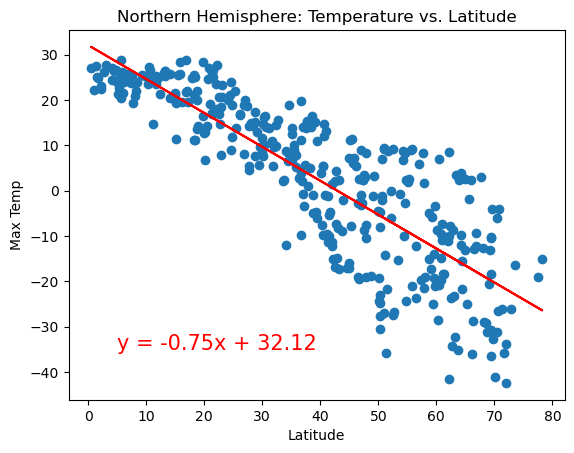

In [14]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Temperature vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()


**Discussion about the linear relationship:** For Northern Hemisphere,The correlation between the temperature of cities and latitude is negative. Which means as the latitude increases the temperature tends to decrease. And, from the r-squared vaule about 74% of the variation in the temperature can be explain by the latitude change. the regression analysis value is high which suggests a better fit for the model.

The r - value is : -0.7363710039216591
The r - squared is : 0.5422422554165921


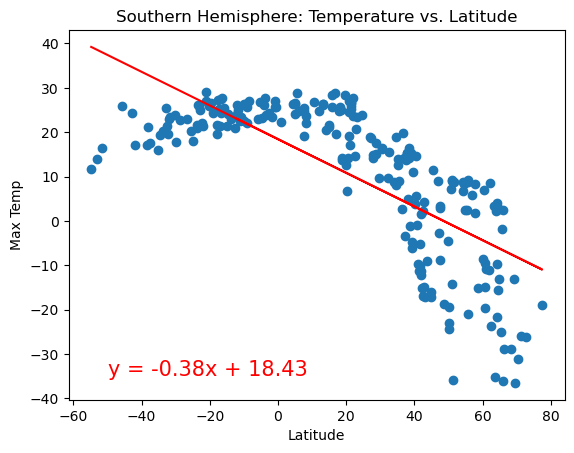

In [15]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,-35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Temperature vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()


**Discussion about the linear relationship:** For Southern Hemisphere, The correlation between the temperature of cities and latitude is negative. Which means that as the latitude increases the temperature tends to decrease. And, the r-squared value suggests that 56.6% of the variation in temperature can be explained by the latitude numbers.


### Humidity vs. Latitude Linear Regression Plot

The r - value is : 0.39139287901026526
The r - squared is : 0.15318838573994414


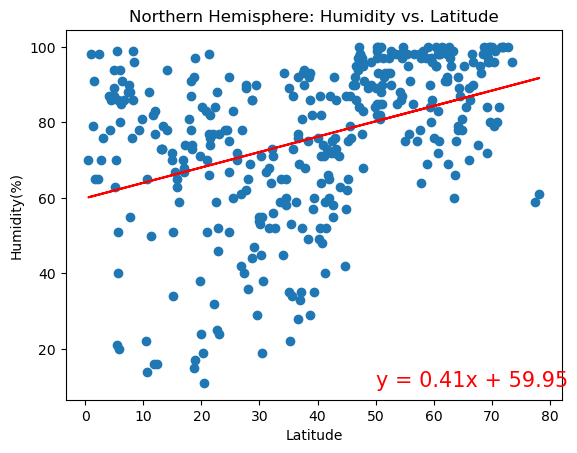

In [16]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** There is very weak relationship between the cities and the humidity. The humidity is ranging from about 5% to 100% between latitude 0 to 30.

The r - value is : -0.0029118783200564984
The r - squared is : 8.479035350815055e-06


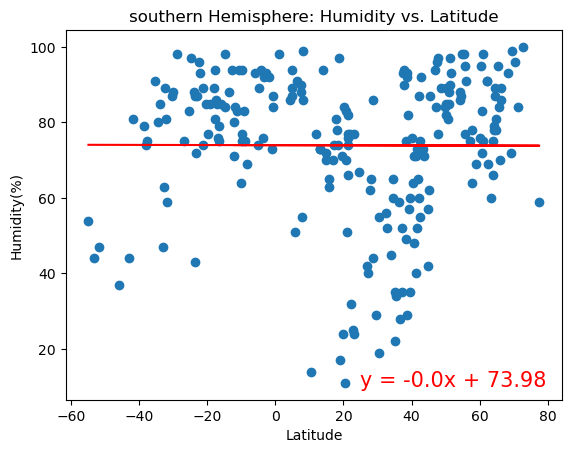

In [17]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("southern Hemisphere: Humidity vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between humidity levels and a city position on the Southern Hemisphere. Higher levels of humidity are observed close to the equator, however, the further south from equator the broader is a humidity level range for the same altitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r - value is : 0.3057043609885387
The r - squared is : 0.09345515632741079


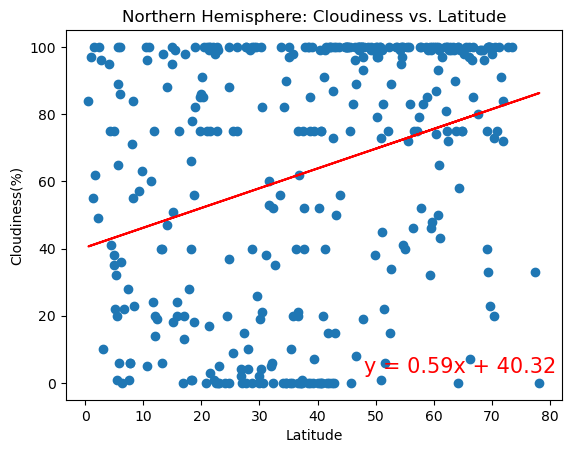

In [18]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,3),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** There is no correlation between cloudiness and a distance from the equator for the cities’ positions. Cloudiness levels are widely spread across all latitudes along the whole Northern Hemisphere.

The r - value is : 0.21182982523705077
The r - squared is : 0.04487187485995947


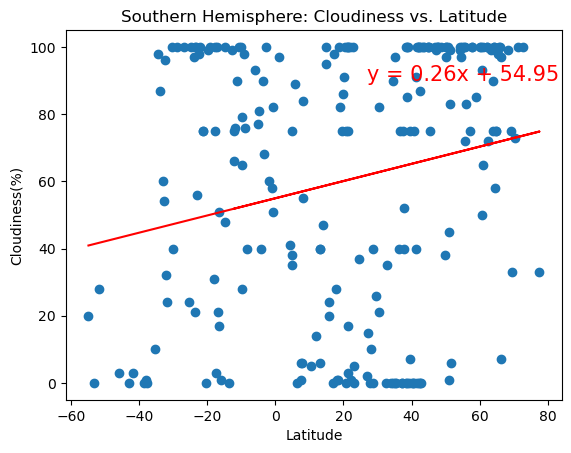

In [19]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** There is no correlation between the cloudiness level and a latitude on the Southern Hemisphere. The level of cloudiness is ranging from 0% to 100% independent of a latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r - value is : 0.05799626855989927
The r - squared is : 0.0033635671668719603


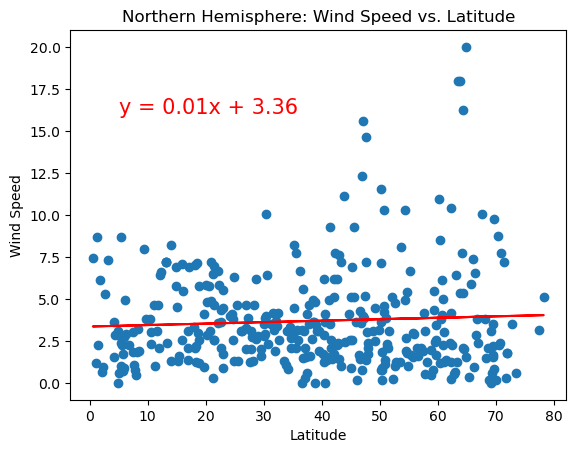

In [20]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,16),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** There is a very low positive correlation between a wind speed and a latitude on the Northernthern Hemisphere. The wind speed lightly increases going farther to the northern hemisphere from the equator.

The r - value is : 0.1365230126010597
The r - squared is : 0.018638532969669105


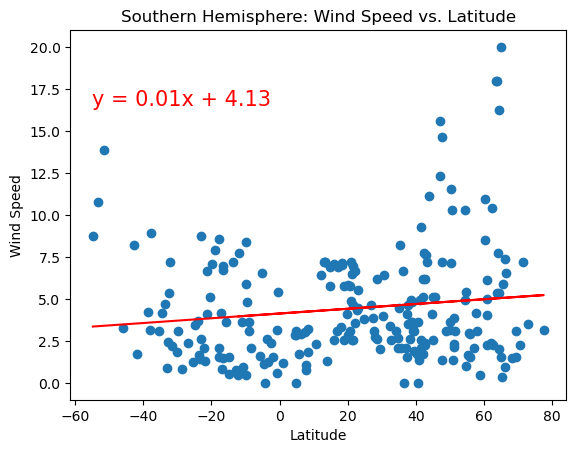

In [21]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,16.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
print(f'The r - value is : {rvalue}')
print(f'The r - squared is : {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** There is a very weak positive correlation between a wind speed and a latitude on the Northernthern Hemisphere. The wind speed lightly decreases going farther to the southern hemisphere from the equator.

# Thank you